<ipython-input-5-cc7fd3e361df>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fremont_data['Date'] = pd.to_datetime(fremont_data['Date'])


Ridge Regression Results:
R^2: 0.3370, MAPE: 31.8395%

Lasso Regression Results:
R^2: 0.3370, MAPE: 31.8398%


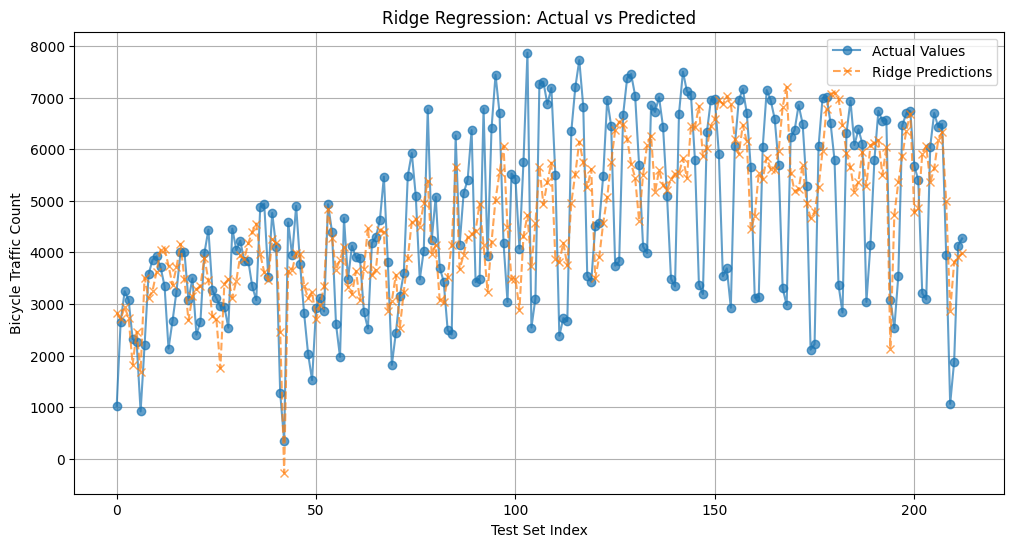

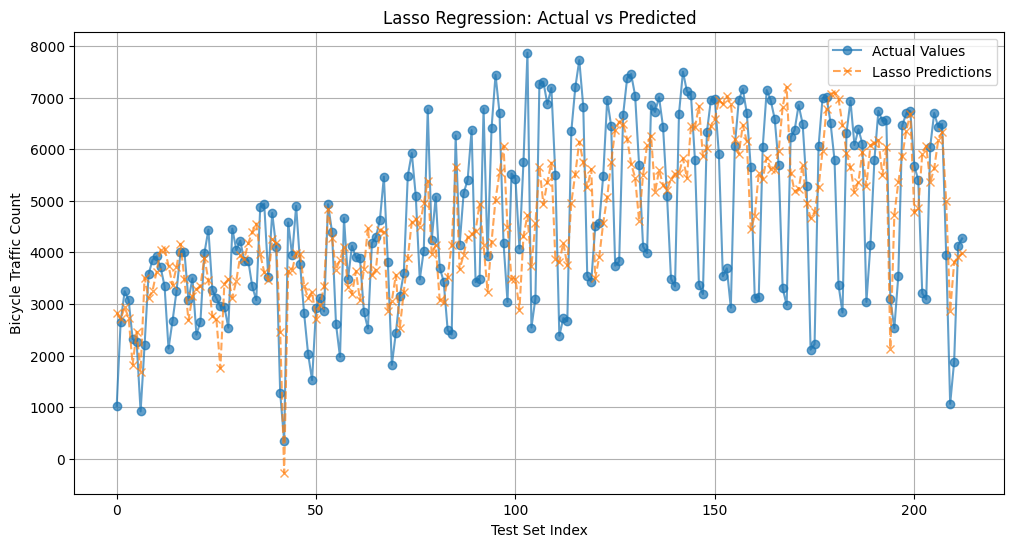

In [5]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load data
fremont_data = pd.read_csv('/content/Fremont_Bridge_Bicycle_Counter.csv')
weather_data = pd.read_csv('/content/BicycleWeather.csv')

# Preprocessing Fremont data
fremont_data['Date'] = pd.to_datetime(fremont_data['Date'])
fremont_data['Daily Total'] = fremont_data.iloc[:, 1:3].sum(axis=1)
fremont_daily = fremont_data.groupby(fremont_data['Date'].dt.date)['Daily Total'].sum().reset_index()
fremont_daily.rename(columns={'Date': 'DATE', 'Daily Total': 'Total_Bicycle_Count'}, inplace=True)
fremont_daily['DATE'] = pd.to_datetime(fremont_daily['DATE'])

# Preprocessing Weather data
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'], format='%Y%m%d')
weather_data.replace(-9999, None, inplace=True)  # Replace missing value indicators with None
weather_data = weather_data[['DATE', 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'AWND']]

# Merge datasets on DATE
merged_data = pd.merge(fremont_daily, weather_data, on='DATE', how='inner')

# Prepare features (X) and target (y)
X = merged_data[['TMAX', 'TMIN', 'PRCP', 'SNOW', 'AWND']].astype(float)
y = merged_data['Total_Bicycle_Count']

# Handle missing values
X = X.fillna(X.median())

# Split the data (last 20% for testing)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_mape = mean_absolute_percentage_error(y_test, ridge_predictions)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_mape = mean_absolute_percentage_error(y_test, lasso_predictions)

# Print results
print("Ridge Regression Results:")
print(f"R^2: {ridge_r2:.4f}, MAPE: {ridge_mape:.4%}")
print("\nLasso Regression Results:")
print(f"R^2: {lasso_r2:.4f}, MAPE: {lasso_mape:.4%}")

# Plot predictions vs actual values for Ridge Regression
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Values", marker='o', linestyle='-', alpha=0.7)
plt.plot(ridge_predictions, label="Ridge Predictions", marker='x', linestyle='--', alpha=0.7)
plt.title("Ridge Regression: Actual vs Predicted")
plt.xlabel("Test Set Index")
plt.ylabel("Bicycle Traffic Count")
plt.legend()
plt.grid(True)
plt.show()

# Plot predictions vs actual values for Lasso Regression
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Values", marker='o', linestyle='-', alpha=0.7)
plt.plot(lasso_predictions, label="Lasso Predictions", marker='x', linestyle='--', alpha=0.7)
plt.title("Lasso Regression: Actual vs Predicted")
plt.xlabel("Test Set Index")
plt.ylabel("Bicycle Traffic Count")
plt.legend()
plt.grid(True)
plt.show()
